In [16]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
%pip install tensorflow
%pip install keras-preprocessing
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/face_recognition')
zip_path = '/content/drive/MyDrive/Colab Notebooks/face_recognition/face_reg.zip'
if os.path.exists(zip_path):
    print("File exists.")
else:
    print("File does not exist.")


File exists.


In [19]:
import zipfile

# Specify the path to the zip file
zip_path = 'face_reg.zip' # Update this to your zip file's name

# Specify the directory where you want to extract the zip file
extract_path = '/content/extracted_files' # You can change this to your preferred directory

# Create the directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [20]:
train_dir="/content/extracted_files/Original Images/Original Images"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [22]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                        

In [23]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
81/81 [==============================] - 329s 4s/step - loss: 3.5335 - accuracy: 0.0835
Epoch 2/30
81/81 [==============================] - 306s 4s/step - loss: 2.7513 - accuracy: 0.2041
Epoch 3/30
81/81 [==============================] - 289s 4s/step - loss: 2.2336 - accuracy: 0.3454
Epoch 4/30
81/81 [==============================] - 297s 4s/step - loss: 1.8089 - accuracy: 0.4539
Epoch 5/30
81/81 [==============================] - 293s 4s/step - loss: 1.5106 - accuracy: 0.5433
Epoch 6/30
81/81 [==============================] - 301s 4s/step - loss: 1.2617 - accuracy: 0.6136
Epoch 7/30
81/81 [==============================] - 290s 4s/step - loss: 0.9584 - accuracy: 0.7069
Epoch 8/30
81/81 [==============================] - 299s 4s/step - loss: 0.7327 - accuracy: 0.7888
Epoch 9/30
81/81 [==============================] - 294s 4s/step - loss: 0.5869 - accuracy: 0.8302
Epoch 10/30
81/81 [==============================] - 296s 4s/step - loss: 0.3937 - accuracy: 0.8923
Epoch 11/

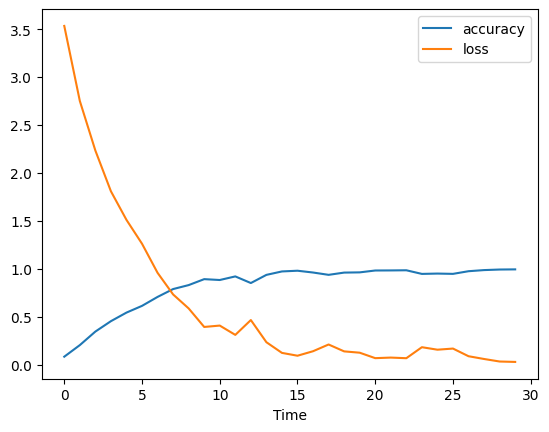

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [25]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

Saving Vijay Deverakonda_32.jpg to Vijay Deverakonda_32.jpg
Uploaded image: Vijay Deverakonda_32.jpg


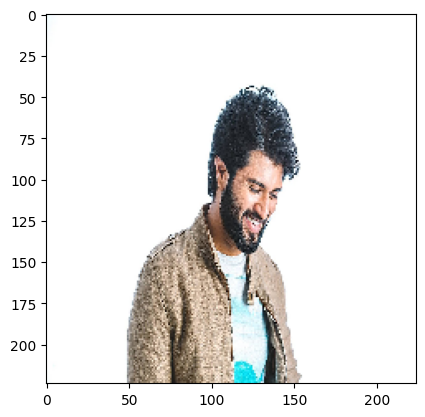

1/1 [==============================] - 0s 44ms/step
Actual: Vijay Deverakonda
Predicted: Vijay Deverakonda


In [42]:
from google.colab import files
uploaded = files.upload()

# Iterate over uploaded files
for img_path in uploaded.keys():
    print("Uploaded image:", img_path)
    predict_image(img_path)
